In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn as sk
from __future__ import division
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_excel('./BioCode for Machine Learning.xlsx')

In [3]:
#Average similarity. One of the features used in Jeremy's original classifier
avsim = df['avg_Similarity']
#Classifications of species
cls = df['Classification']
#branch distance; also used by jeremy, apparently one of the better predictors
bdist = df['Distance_of_Branch']

## Simple Regression (one label at a time)

In [4]:
#How many of the classifications are known
print((cls.fillna(0) != 0).sum()/cls.size)

0.345294238261


In [5]:
#Samples where there are no NaNs
valid_samples = np.array((cls.fillna(0) != 0) * (1 - bdist.isnull()) * (1 - avsim.isnull())).astype(np.bool)

In [6]:
#How many samples are usable
valid_samples.sum(), avsim.size, valid_samples.sum()/avsim.size

(1684, 4877, 0.34529423826122618)

In [7]:
# Turning 'Indigenous' to 1, and others to 0
cls_binary = (cls == 'Indigenous')*1

In [8]:
#filter
avsim_valid, cls_valid, bdist_valid = avsim[valid_samples], cls_binary[valid_samples], bdist[valid_samples]

In [9]:
#Split into test/train
test_train_ratio = 0.9
avs_train, avs_test, cls_train, cls_test, bdist_train, bdist_test = train_test_split(avsim_valid, cls_valid, bdist_valid, test_size=test_train_ratio)

In [10]:
#Just to get an idea of test/train sizes:
avs_train.size, avs_test.size

(168, 1516)

In [11]:
from sklearn.linear_model import LogisticRegression,ElasticNet,Lasso,LinearRegression
from sklearn.metrics import zero_one_loss, mean_squared_error, mean_squared_log_error

In [12]:
clf = LinearRegression()

In [13]:
X = np.array([np.array(avs_train), np.array(cls_train)]).T
y = cls_train
X_test = np.array([np.array(avs_test), np.array(cls_test)]).T

In [14]:
# Making sure that class sizes are similar in test/train sets
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

(0.13095238095238096, 0.17018469656992086)

In [15]:
#LinReg
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1 #Threshold
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 1.0
Weights: [ 0.  1.]


In [16]:
#Seems like branch distance is a much better predictor than avg sim. this matches Jeremy's observation

In [17]:
#LogReg
clf = LogisticRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 1.0
Weights: [[-0.02106685  4.66634254]]


In [18]:
#These predictions look impressive until you realize that it is possible to get 83% By just predicting 0's.

In [19]:
print('Prediciton accuracy:', np.mean((cls_test == 0)))

Prediciton accuracy: 0.82981530343


In [20]:
#What about other labels?

In [21]:
clf = Lasso()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.82981530343
Weights: [ 0.  0.]


In [22]:
clf = ElasticNet()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.82981530343
Weights: [ 0.  0.]


In [23]:
#invasive

In [24]:
# Turning 'Invasive' to 1, and others to 0
cls_binary = (cls == 'Invasive')*1
avsim_valid, cls_valid, bdist_valid = avsim[valid_samples], cls_binary[valid_samples], bdist[valid_samples]
#Split into test/train
test_train_ratio = 0.9
avs_train, avs_test, cls_train, cls_test, bdist_train, bdist_test = train_test_split(avsim_valid, cls_valid, bdist_valid, test_size=test_train_ratio)
X = np.array([np.array(avs_train), np.array(cls_train)]).T
y = cls_train
X_test = np.array([np.array(avs_test), np.array(cls_test)]).T
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

(0.29761904761904762, 0.28693931398416889)

In [25]:
#LinReg
clf = LinearRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1 #Threshold
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediction accuracy: 1.0
Weights: [ -9.53413633e-20   1.00000000e+00]


In [26]:
#LogReg
clf = LogisticRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediction accuracy: 1.0
Weights: [[-0.01685021  5.16322822]]


In [27]:
print('Prediction accuracy:', np.mean((cls_test == 0)))

Prediction accuracy: 0.713060686016


In [28]:
#Introduced

In [29]:
# Turning 'Introduced' to 1, and others to 0
cls_binary = (cls == 'Introduced')*1
avsim_valid, cls_valid, bdist_valid = avsim[valid_samples], cls_binary[valid_samples], bdist[valid_samples]
#Split into test/train
test_train_ratio = 0.9
avs_train, avs_test, cls_train, cls_test, bdist_train, bdist_test = train_test_split(avsim_valid, cls_valid, bdist_valid, test_size=test_train_ratio)
X = np.array([np.array(avs_train), np.array(cls_train)]).T
y = cls_train
X_test = np.array([np.array(avs_test), np.array(cls_test)]).T
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

(0.5892857142857143, 0.54089709762532978)

In [30]:
#LinReg
clf = LinearRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1 #Threshold
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 1.0
Weights: [  6.67932524e-19   1.00000000e+00]


In [31]:
#LogReg
clf = LogisticRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 1.0
Weights: [[-0.01626282  5.28163368]]


In [32]:
print('Prediciton accuracy:', np.mean((cls_test == 1)))

Prediciton accuracy: 0.540897097625


### In principle, one can train simple linear regression on 10% of data and get 100% accuracy. But note that we are only looking at results for ~1000 points. This is probably overfitting and we probably want a more principled approach that is robust to errors in sequencing and matching etc. Since the dataset already has information about those things, we should try to integrate it. Also, branch distance already includes a lot of preprocessing. Can we replicate its effectiveness, but with more robustness?

Spoiler: Performance decreases

## Creating a similarity graph

In [33]:
from tqdm import trange

In [34]:
seq = df['Aligned Sequence']
seq = np.array(seq.fillna('None'))
seq_arrays = [np.array([i for i in s]) for s in seq]

In [35]:
mat_size = len(seq_arrays)
sim_mat = -np.ones((mat_size, mat_size))

In [36]:
# %%time
# for i in trange(mat_size):
#     if seq[i] != 'None':
#         a = seq_arrays[i]
#         for j in range(i):
#             if seq[j] != 'None':
#                 b = seq_arrays[j]
#                 match = (a==b)
#                 valid = ((a != '-')* (b != '-')) == 1
#                 sim_mat[i,j] = np.mean(match[valid])
#                 sim_mat[j,i] = sim_mat[i,j]
#         sim_mat[i,i] = 1

100%|██████████| 4877/4877 [06:08<00:00, 13.22it/s]

CPU times: user 6min 8s, sys: 876 ms, total: 6min 9s
Wall time: 6min 8s


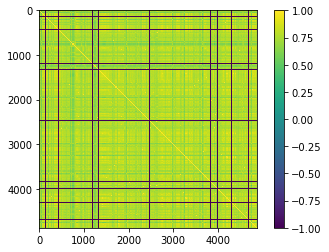

In [37]:
plt.imshow(sim_mat)
plt.colorbar()

In [47]:
# np.save('sim_mat.npy', sim_mat)

In [38]:
valid_idx = np.array([i for i in range(len(seq)) if seq[i] != 'None'])

In [39]:
valid_idx.size, len(seq)

(4639, 4877)

In [40]:
valid_mat = sim_mat[valid_idx][:, valid_idx]

In [41]:
sim_mat.shape, valid_mat.shape

((4877, 4877), (4639, 4639))

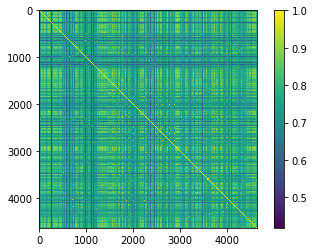

In [42]:
plt.imshow(valid_mat)
plt.colorbar()

In [43]:
valid_mat.min(), valid_mat.max()

(0.41873278236914602, 1.0)

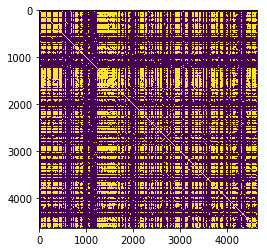

In [44]:
plt.imshow(valid_mat > 0.8)

In [45]:
## Most sequences are more than 80% similar to others
## Also, lots of clustering

In [46]:
# %%time
# u,s,v = np.linalg.svd(valid_mat, full_matrices=0)

CPU times: user 4min 24s, sys: 1min 52s, total: 6min 16s
Wall time: 58.3 s


In [48]:
# np.save('u.npy', u)
# np.save('s.npy', s)
# np.save('v.npy', v)

In [2]:
plt.plot(s)

NameError: name 'plt' is not defined

In [54]:
s[:10]

array([ 3551.81075588,    88.06784844,    62.77499338,    44.84708554,
          32.04235187,    24.1162295 ,    17.3104206 ,    16.30857238,
          14.87169289,    14.16184307])

In [55]:
# This is basically a rank 1 matrix

In [135]:
rank = 10
approx = u[:,:rank].dot(np.diag(s[:rank])).dot(v[:rank])
residues = approx - valid_mat
errors = (residues/valid_mat)

(array([  5.60000000e+01,   2.06600000e+03,   7.05100000e+03,
          4.38350000e+04,   1.08610000e+05,   1.38062300e+06,
          1.85545060e+07,   1.39537200e+06,   2.76260000e+04,
          5.76000000e+02]),
 array([-0.62207031, -0.52664745, -0.43122459, -0.33580173, -0.24037887,
        -0.14495601, -0.04953315,  0.04588971,  0.14131256,  0.23673542,
         0.33215828]),
 <a list of 10 Patch objects>)

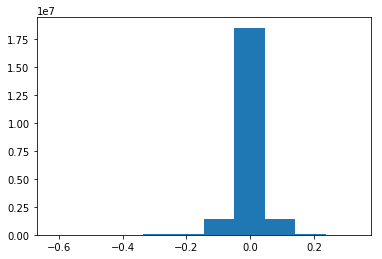

In [88]:
# plt.hist(errors.flatten())

(array([  1.00000000e+00,   4.00000000e+00,   1.00000000e+01,
          3.15000000e+02,   1.64744000e+05,   2.13539440e+07,
          7.11000000e+02,   4.23000000e+02,   1.53000000e+02,
          1.60000000e+01]),
 array([-0.01478794, -0.01193264, -0.00907734, -0.00622204, -0.00336673,
        -0.00051143,  0.00234387,  0.00519918,  0.00805448,  0.01090978,
         0.01376508]),
 <a list of 10 Patch objects>)

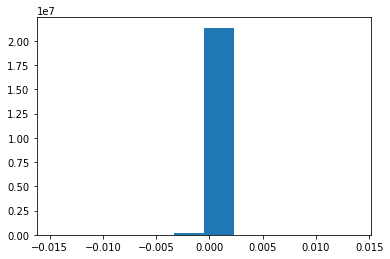

In [86]:
# rank = 1000
# approx_1000 = u[:,:rank].dot(np.diag(s[:rank])).dot(v[:rank])
# errors = ((approx_1000 - valid_mat)/valid_mat)
# plt.hist(errors.flatten())

In [ ]:
#Time to fit a linear regression on these approximations and residues

In [136]:
#index of valid training points in valid_mat
valid_idx = list(valid_idx)
valid_mat_idx = [valid_idx.index(i) for i in np.where(valid_samples)[0] if i in valid_idx]

In [137]:
len(valid_mat_idx)

1684

In [138]:
mat = approx[valid_mat_idx]
res_mat = residues[valid_mat_idx]
print(mat.shape, res_mat.shape)

(1684, 4639) (1684, 4639)


In [148]:
test_train_ratio = 0.9 #Use only 10% of the data for training
mat_train, mat_test, cls_train, cls_test, res_train, res_test =  train_test_split(mat, cls_valid, res_mat, test_size=test_train_ratio)

In [149]:
print(mat_train.shape, mat_test.shape)

(168, 4639) (1516, 4639)


In [150]:
# Log reg
X = mat_train
y = cls_train
X_test = mat_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = LogisticRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediction accuracy: 0.620052770449
Weights: [[ 0.00602914 -0.09286796  0.00112857 ..., -0.08998306 -0.09136232
   0.01324386]]


Prediction accuracy: 0.806068601583
Weights: [ 0.03483538  1.10994862  0.73983109 ..., -0.53595306 -0.00414334
 -0.09049196]


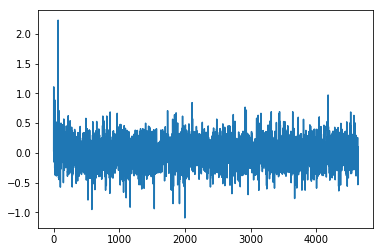

In [151]:
# Log reg
X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = LinearRegression()
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)
plt.plot(clf.coef_.T)

Prediction accuracy: 0.611477572559


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


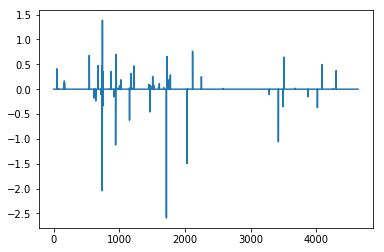

In [152]:
# Lasso
X = mat_train
y = cls_train
X_test = mat_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = Lasso(alpha=1e-5)
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
plt.plot(clf.coef_.T)

Prediction accuracy: 0.799472295515


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


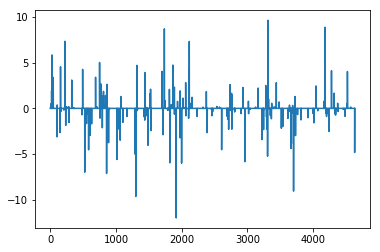

In [153]:
# Lasso
X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = Lasso(alpha=1e-5)
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier
plt.plot(clf.coef_.T)

In [154]:
from sklearn.svm import SVC

In [155]:
# SVM
X = res_train
y = cls_train
X_test = res_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = SVC(C=1e10,kernel='poly')
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier

Prediction accuracy: 0.558707124011


In [156]:
X = mat_train
y = cls_train
X_test = mat_test
cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

clf = SVC(C=1e10,kernel='poly')
clf.fit(X, y)
prediction = (clf.predict(X_test) > 0.5)*1
#Prediction accuracy
print('Prediction accuracy:', np.mean((prediction == np.array(cls_test))*1))
#Coefficients used by the classifier

Prediction accuracy: 0.630606860158


In [ ]:
# Adjusting the hyperparams (matrix rank, C for SVM, etc.) easily gives accuracies anywhere between 60-90
# Depending on the method, performance depends highly on the number of data points used.
# One next step would be to find something that is reasonably robust to training set size.